# Important parts to install

In [2]:
!pip install compress_pickle 
!pip install openrouteservice

# Import few libs

In [13]:
import compress_pickle as pickle
import pandas as pd
import numpy as np
import openrouteservice
import time
from tqdm import tqdm

# Register and obtain key form openrouteservice

* Go link https://openrouteservice.org/dev/#/signup to register on service (it's totally free)
* Once register and confirm your account login here https://openrouteservice.org/dev/#/login
* Register your token (it's valiid only 24 hours and allow only 2000 route requests. with 40 req/min limit
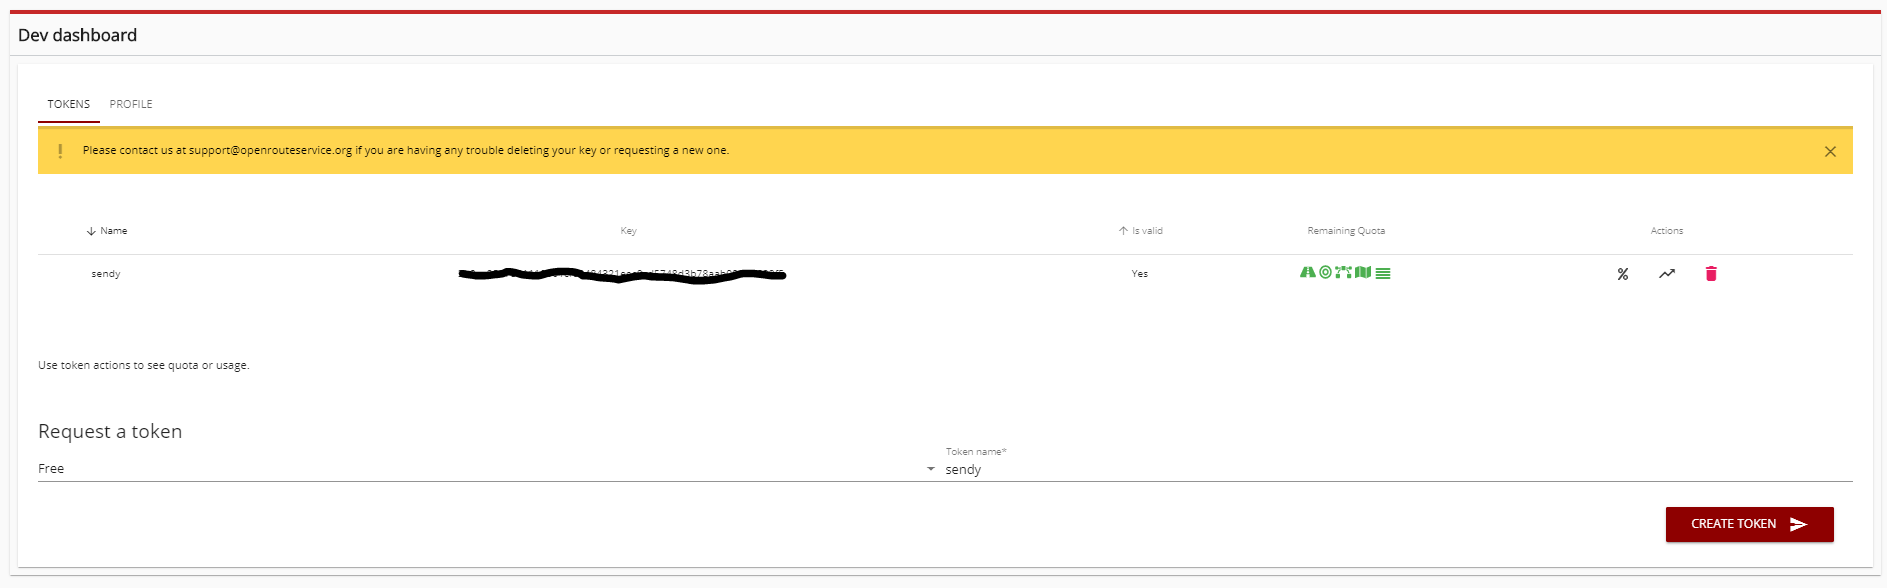
* Copy token to variable below (it's located at place where i draw thik blak line)


In [27]:
open_route_token = 'Your_Token_Here'

# Other constants

In [30]:
total_requests = 2000
req_per_minute = 40

# Load dataset

In [7]:
df = pickle.load('compressed_df.pkl')

In [8]:
df.head()

,order,pick_lat,pick_lon,dst_lat,dst_lon,is_train
0,Order_No_4211,-1.317755,36.830370,-1.300406,36.829741,1
1,Order_No_25375,-1.351453,36.899315,-1.295004,36.814358,1
2,Order_No_1899,-1.308284,36.843419,-1.300921,36.828195,1
3,Order_No_9336,-1.281301,36.832396,-1.257147,36.795063,1
4,Order_No_27883,-1.266597,36.792118,-1.295041,36.809817,1


# <span style="color:red"> Here please be carefull!!! </span> - we need properly split df by emails

* Go to https://docs.google.com/spreadsheets/d/1gB2DYN4qV3LX8c9iPAo7_8nf44PAUbdJ5Jr4AaagfG4/
* Find your e-mail and copy data set counter form 'Начало моего куска' column to variable below (as int)
* If you can;t find your e-mail - please fill form https://forms.gle/hwc2mJ4Y1hBZKRF69 and ping my by telegram @gleberof

In [57]:
my_part_start = Your start number here. See above

# Let's parse - it takes about an hour because of limits

In [58]:
client = openrouteservice.Client(key=open_route_token)

my_df = df[my_part_start:(my_part_start+total_requests)]

In [59]:
osr_result = {}
req_count = 0
time_round = time.time()

for index, row in tqdm(my_df.iterrows(), total=my_df.shape[0]):
    
    coord = ((row['pick_lon'],row['pick_lat']),(row['dst_lon'],row['dst_lat']))
    
    try:
        osr_result[index] = routes = client.directions(coord, profile='driving-car')
    except:
        # just in case smthin goess wrong
        osr_result[index] = np.nan
        
    #this hack is for handle 40 req per minute limit
    req_count += 1
    if req_count <= 40:
        time.sleep(1.3) # just in case wait for 1.3 sec between requests
    else:
        time_to_wait = 60.5-(time.time() - time_round)
        if time_to_wait > 0: 
            print(f'Hit the limit of 40 req/min will wait for {time_to_wait} seconds')
            time.sleep(time_to_wait)
        # start new round
        req_count = 0
        time_round = time.time()


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [05:58<00:00,  1.79s/it]


# Save results
* as a result you will get *_osr.pkl file about 6Mb in total
* send me this file to me telegram @gleberof. I will consolidate and publish the result
* You can check status via https://docs.google.com/spreadsheets/d/1gB2DYN4qV3LX8c9iPAo7_8nf44PAUbdJ5Jr4AaagfG4/

In [64]:
pickle.dump(osr_result,f'{my_part_start}_osr.pkl')